<a href="https://colab.research.google.com/github/Shalini-13/733-assignment/blob/main/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Q1: PCA Warm-up - Compute First Two Components for First Three Students

import numpy as np
import pandas as pd

# Step 1: Sample standardized data for 3 students across 3 subjects (e.g., Math, Physics, English)
X = np.array([
    [0.5, -1.2, 0.3],    # Student 1
    [-0.3, 0.8, -0.7],   # Student 2
    [1.1, -0.4, 0.5]     # Student 3
])

# Step 2: PCA weights (loadings) for top 2 components
# Each column represents a principal component
W = np.array([
    [0.6, 0.7],    # Subject 1
    [0.4, -0.6],   # Subject 2
    [0.7, 0.4]     # Subject 3
])  # Shape: (3 features × 2 components)

# Step 3: Compute the dot product to get projected PCA scores
Z = np.dot(X, W)

# Step 4: Present as a DataFrame
df_pca = pd.DataFrame(Z, columns=['PC1', 'PC2'], index=['Student 1', 'Student 2', 'Student 3'])
print("PCA Component Scores (First 3 Students):")
df_pca


PCA Component Scores (First 3 Students):


,PC1,PC2
Student 1,0.03,1.19
Student 2,-0.35,-0.97
Student 3,0.85,1.21


Question 2

In [3]:
import pandas as pd

df = pd.read_csv("/content/roles_life_cycle_mapping_wide.csv")
df.dropna(inplace=True)  # remove missing values


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Ensure pandas is imported if not already

# Assuming 'Job_Title' is the column causing the issue and is not needed for scaling
# and other columns are numerical.
# If there are other non-numerical columns, you need to identify and exclude them as well.

# Select only numerical columns from the DataFrame
# One way is to drop the non-numerical column(s) or select numerical dtypes
numerical_cols = df.select_dtypes(include=np.number).columns
X = df[numerical_cols].values  # Select only numerical column values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# You can now use X_scaled for further steps like PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


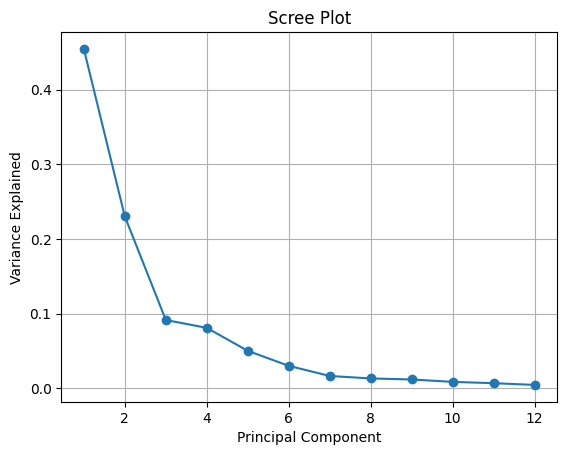

Cumulative variance: [0.45463528 0.68492771 0.77650611 0.85752964 0.90776764 0.93793075
 0.95452404 0.96783313 0.97974612 0.98843228 0.99537851 1.        ]


In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative variance:", cumulative_variance)


In [8]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.to_csv("pca_transformed.csv", index=False)


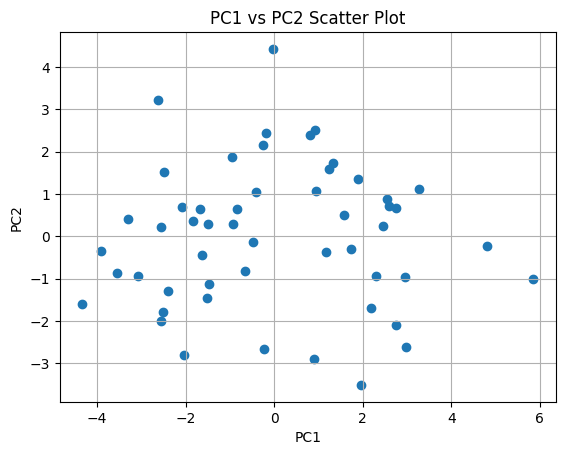

In [9]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2 Scatter Plot")
plt.grid(True)
plt.show()


Question 3


In [11]:
df = pd.read_csv("BMI.csv")
X = df.drop(columns=['fatpctg', 'Age'])
y = df['fatpctg']


In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
print("Top 5 RFE features:", selected_features_rfe.tolist())


Top 5 RFE features: ['Neck', 'Abdomen', 'Hip', 'Forearm', 'Wrist']


In [13]:
from sklearn.linear_model import LassoCV
import numpy as np

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
top_features_lasso = X.columns[np.argsort(importance)[-5:]]
print("Top 5 Lasso features:", top_features_lasso.tolist())


Top 5 Lasso features: ['Thigh', 'Height', 'Neck', 'Weight', 'Abdomen']


In [15]:
correlations = df.corr()['fatpctg'].drop(['fatpctg', 'Age']).abs()
top_features_corr = correlations.sort_values(ascending=False).head(5).index.tolist()
print("Top 5 Correlation features:", top_features_corr)


Top 5 Correlation features: ['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh']
